## Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.options.display.max_columns = 150
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [214]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [215]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [216]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [217]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [218]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [219]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We can make the following observations:

- The DETE survey dataframe contains "Not Stated" values instead of NaN.
- Both dataframes contain columns with missing values.
- Both dataframes contain columns that aren't useful for analysis, i.e Aboriginal.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.
- Inconsistent upper-casing of the column names.

# Identify Missing Values and Drop Unnecessary Columns

In [220]:
#Read "Not Stated values as NaN"
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [221]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [222]:
#Remove columns that we don't need for analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check if the columns have been dropped.
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

# Clean Column Names

In [223]:
#Lowercase, strip white case and replace spaces with underscores for column names
dete_survey_updated.columns = (dete_survey_updated.columns
 .str.replace(" ", "_")
 .str.strip()
 .str.lower()
)

In [224]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [225]:
#Rename columns
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id','CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender',
                           'CurrentAge. Current Age': 'age',
                           'Employment Type. Employment Type': 'employment_status',
                           'Classification. Classification': 'position',
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)


In [226]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the Data

In [227]:
print(dete_survey_updated["separationtype"].value_counts())
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [228]:
#Select only the data for survey respondents who have a resignation separation type
dete_resignations = (dete_survey_updated[dete_survey_updated["separationtype"]
                                         .str.contains("Resignation") == True])
dete_resignations = dete_resignations.copy()

In [229]:
#Select only the data for survey respondents who have a resignation separation type
tafe_resignations = (tafe_survey_updated[tafe_survey_updated["separationtype"]
                                        == "Resignation"])
tafe_resignations = tafe_resignations.copy()

In [230]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [231]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Verify the Data

In [232]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [233]:
#Extract years and convert to float
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split('/').str[-1].astype(float)

In [234]:
#Check for outliers
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [235]:
#Check for outliers
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [236]:
#Check for outliers
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

# Create a New Column

In [237]:
#Create new column 'institute_service' that contains the length of time the employee spent in their
# workplace
dete_resignations["institute_service"] = (dete_resignations["cease_date"] 
                                          - dete_resignations["dete_start_date"])

In [238]:
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

# Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

tafe_survey_updated:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

detesurveyupdated:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [239]:
#Check unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [240]:
#Check unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [241]:
# Create new column "dissatisfied" that contains values that are True, False or NaN
def update_values(x):
    if x == "-":
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations["dissatisfied"] = (
    tafe_resignations[["Contributing Factors. Dissatisfaction",
                       "Contributing Factors. Job Dissatisfaction"]]
    .applymap(update_values).any(axis=1, skipna=False))

In [242]:
# Create new column "dissatisfied" that contains values that are True, False or NaN
dete_resignations["dissatisfied"] = (
    dete_resignations[["job_dissatisfaction","dissatisfaction_with_the_department",
                      "physical_work_environment","lack_of_recognition","lack_of_job_security",
                      "work_location","employment_conditions","work_life_balance","workload"]]
    .any(axis=1, skipna=False))

In [243]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [244]:
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [245]:
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

# Combine the Data

In [246]:
#Create column "institute" in both dataframes
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
#Combine both dataframes
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)
#Remove columns with less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


# Clean the Service Column

In [247]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [248]:
#Extract years and convert to float
combined_updated["institute_service"] = (combined_updated["institute_service"].astype("str")
                                        .str.extract(r"(\d+)")).astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [249]:
#Convert years of service to categories
def career_stage(x):
    if x < 3:
        return "New"
    elif 3 <= x < 7:
        return "Experienced"
    elif 7 <= x < 11:
        return "Established"
    elif pd.isnull(x):
        return np.nan
    else:
        return "Veteran"

#Create column "service_cat" with the categories from function
combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)

In [250]:
#Check
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Perform Initial Analysis

In [251]:
#Verify unique values
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [252]:
#Replace NaNs with most frequent value, False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [253]:
dis_pct = combined_updated.pivot_table(index="service_cat",values="dissatisfied")

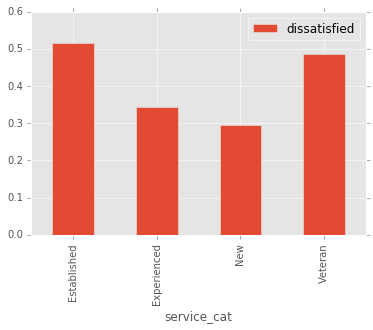

In [254]:
%matplotlib inline
dis_pct.plot(kind="bar")

We can conclude that people with more than 7 years of experience at a company are more likely to resign due to some kind of dissatisfaction than employees with less than 7 years of experience.